In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a DataFrame
file_path_1 = 'simulation_results.csv'  # Replace with the actual path to your CSV
file_path_2 = 'simulation_results_2_threads.csv'
file_path_3 = 'simulation_results_4_threads.csv'
file_path_4 = 'simulation_results_8_threads.csv'

oneThread = pd.read_csv(file_path_1) 
twoThreads = pd.read_csv(file_path_2)
fourThreads = pd.read_csv(file_path_3)
eightThreads = pd.read_csv(file_path_4)



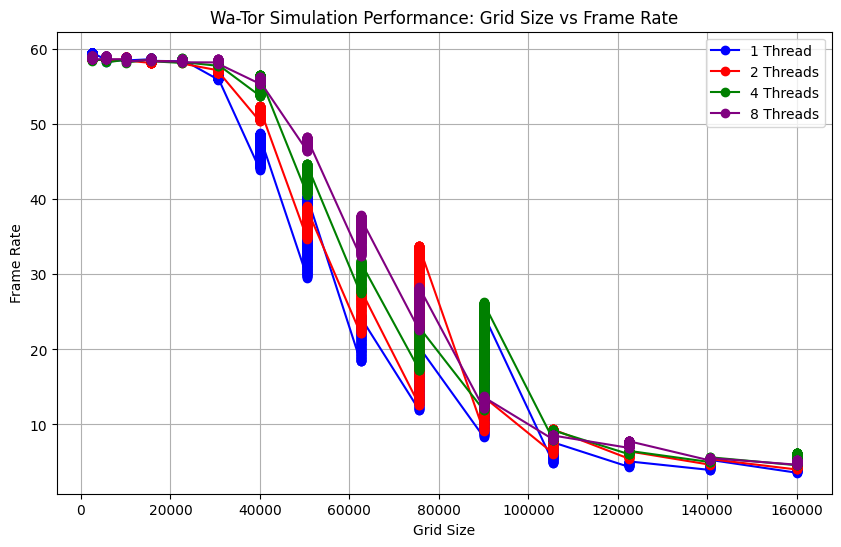

In [2]:
# Plot the data: Grid Size vs Frame Rate for all datasets without smooth curves
plt.figure(figsize=(10, 6))

# Plot for 1 Thread
plt.plot(oneThread['Grid Size'], oneThread['Frame Rate'], marker='o', linestyle='-', color='blue', label='1 Thread')

# Plot for 2 Threads
plt.plot(twoThreads['Grid Size'], twoThreads['Frame Rate'], marker='o', linestyle='-', color='red', label='2 Threads')

# Plot for 4 Threads
plt.plot(fourThreads['Grid Size'], fourThreads['Frame Rate'], marker='o', linestyle='-', color='green', label='4 Threads')

# Plot for 8 Threads
plt.plot(eightThreads['Grid Size'], eightThreads['Frame Rate'], marker='o', linestyle='-', color='purple', label='8 Threads')

# Add labels, title, legend, and grid
plt.xlabel('Grid Size')
plt.ylabel('Frame Rate')
plt.title('Wa-Tor Simulation Performance: Grid Size vs Frame Rate')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



In [5]:
# Function to calculate the average frame rate for each grid size
def average_frame_rate(data):
    return data.groupby('Grid Size')['Frame Rate'].mean().reset_index()

# Process data for each thread count (assuming the DataFrames are already loaded: oneThread, twoThreads, etc.)
avg_one_thread = average_frame_rate(oneThread)
avg_two_threads = average_frame_rate(twoThreads)
avg_four_threads = average_frame_rate(fourThreads)
avg_eight_threads = average_frame_rate(eightThreads)

# Add thread information
avg_one_thread['Threads'] = 1
avg_two_threads['Threads'] = 2
avg_four_threads['Threads'] = 4
avg_eight_threads['Threads'] = 8

# Combine results into a single DataFrame
combined_results = pd.concat([avg_one_thread, avg_two_threads, avg_four_threads, avg_eight_threads])

# Pivot the data to create a clear table format
table = combined_results.pivot(index='Grid Size', columns='Threads', values='Frame Rate').reset_index()

# Display the table
import ace_tools_open as tools; tools.display_dataframe_to_user(name="Average Frame Rate by Grid Size and Thread Count", dataframe=table)

Average Frame Rate by Grid Size and Thread Count
